### **🛠 План проекта (шаблон):**
- Загрузка данных
- Очистка и предобработка
- Анализ признаков (EDA)
- Feature Engineering
- Масштабирование + one-hot
- Train/Test split
- Обучение моделей (логрег, дерево, бустинг)
- Оценка (accuracy, F1, confusion matrix)
- Сохранение модели
- (опционально): деплой в виде API (FastAPI/Gradio)

Dataset:

https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv



### **📥 Загрузка и первый осмотр данных**

In [1]:
import pandas as pd

# Загрузка CSV (из интернета)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

# Основная информация
print("📊 Размер датасета:", df.shape)
print("\n📋 Названия колонок:", list(df.columns))

# Первые строки
display(df.head())

# Описание признаков
display(df.describe())

# Проверим пропуски
print("\n🔍 Пропущенные значения:")
print(df.isnull().sum())


📊 Размер датасета: (1599, 12)

📋 Названия колонок: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000



🔍 Пропущенные значения:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


**EDA (Exploratory Data Analysis)** — разведочный анализ данных.

Цель — понять структуру данных, найти закономерности, выбросы, зависимости и проблемы ещё до обучения модели.

| Этап                    | Что делаем                                 |
| ----------------------- | ------------------------------------------ |
| 📏 Распределения        | Гистограммы, boxplots                      |
| 📈 Корреляции           | Матрица корреляции между признаками        |
| 🔍 Пропуски/дубликаты   | Ищем "грязные" данные                      |
| 📦 Категории и числовые | Что за признаки: числовые? категориальные? |
| 📐 Статистика           | `describe()`, `value_counts()` и т.д.      |
| 🧠 Связь с целевой      | Как признаки влияют на `quality`           |

**📊 EDA: визуализация распределений и корреляций:**

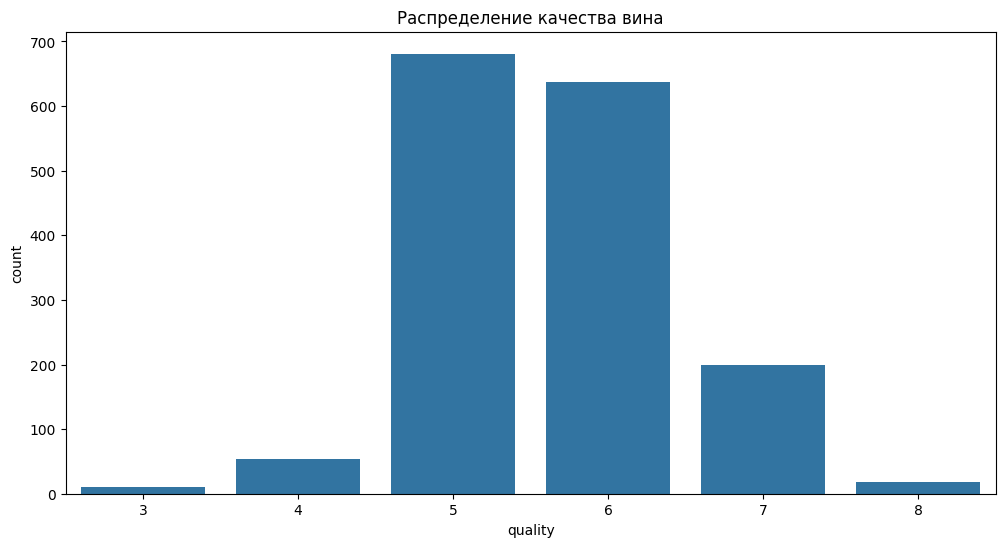

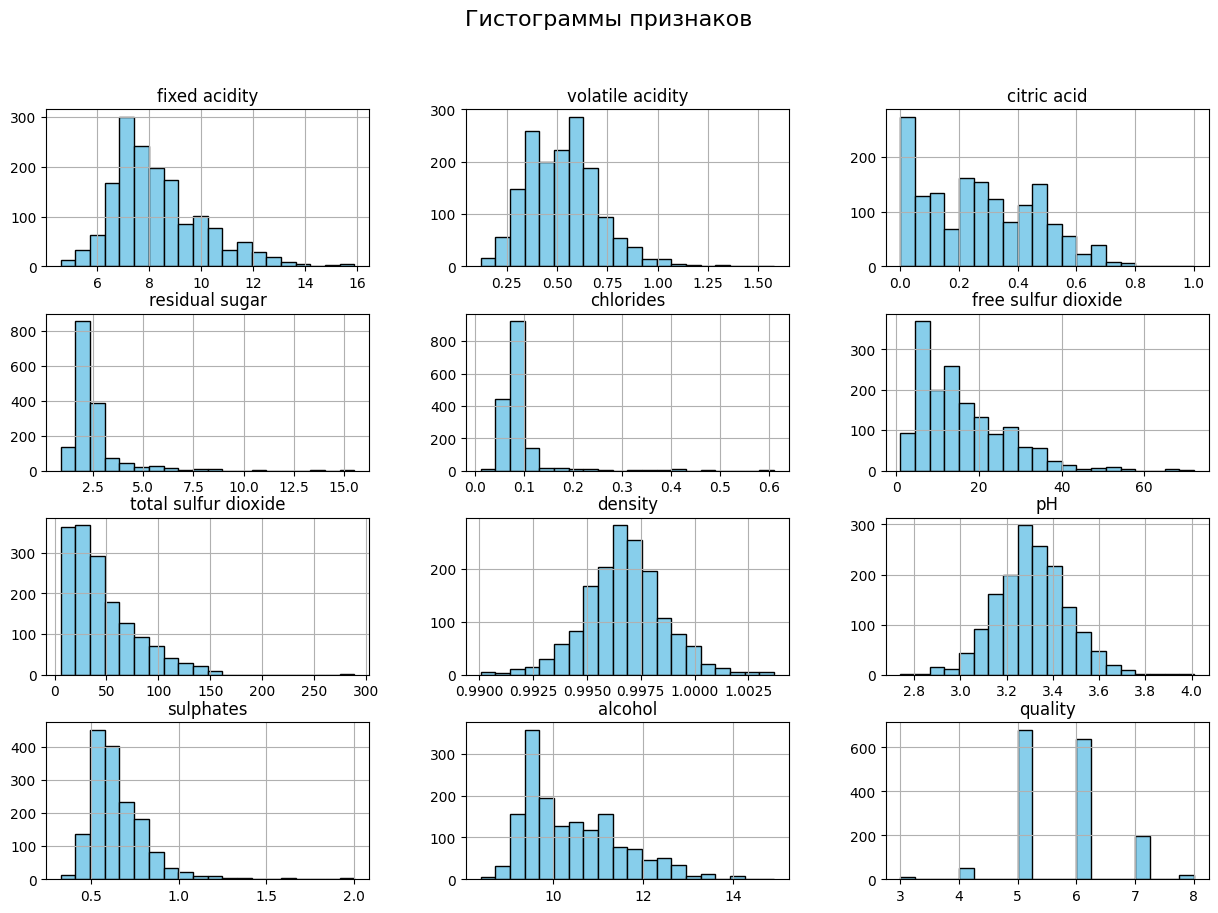

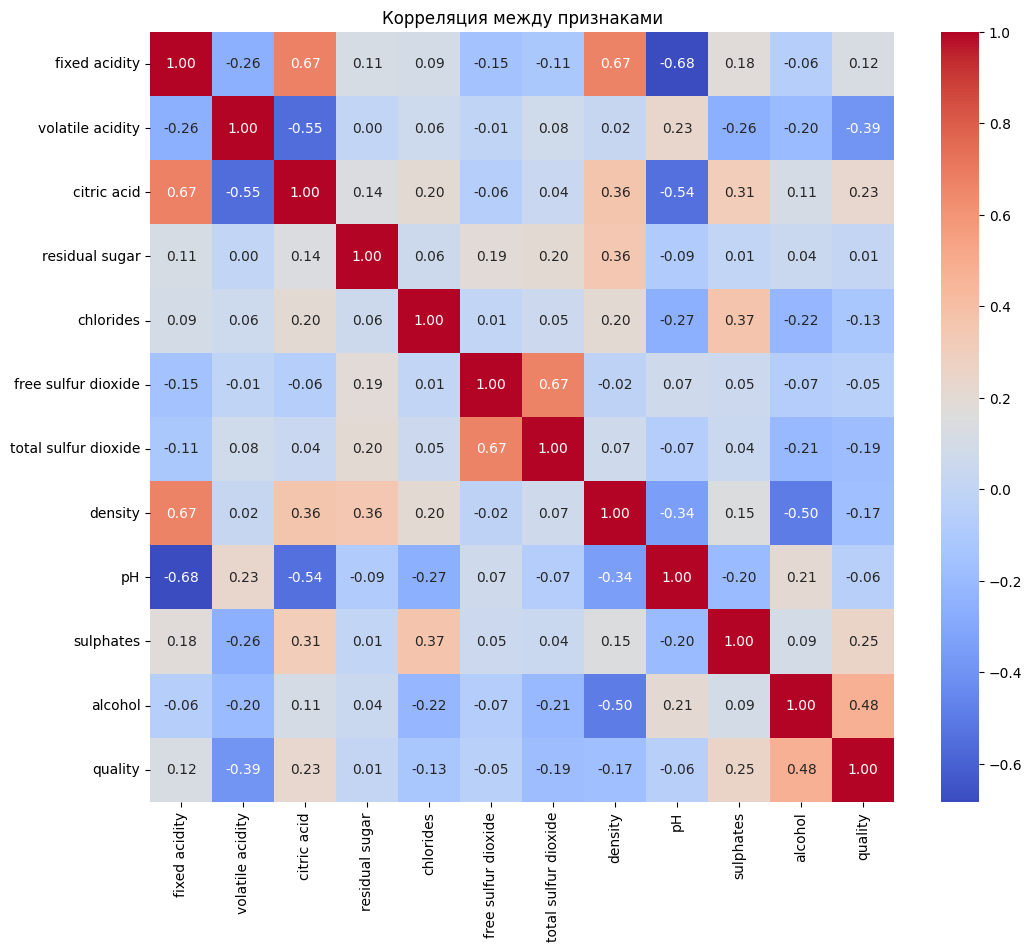

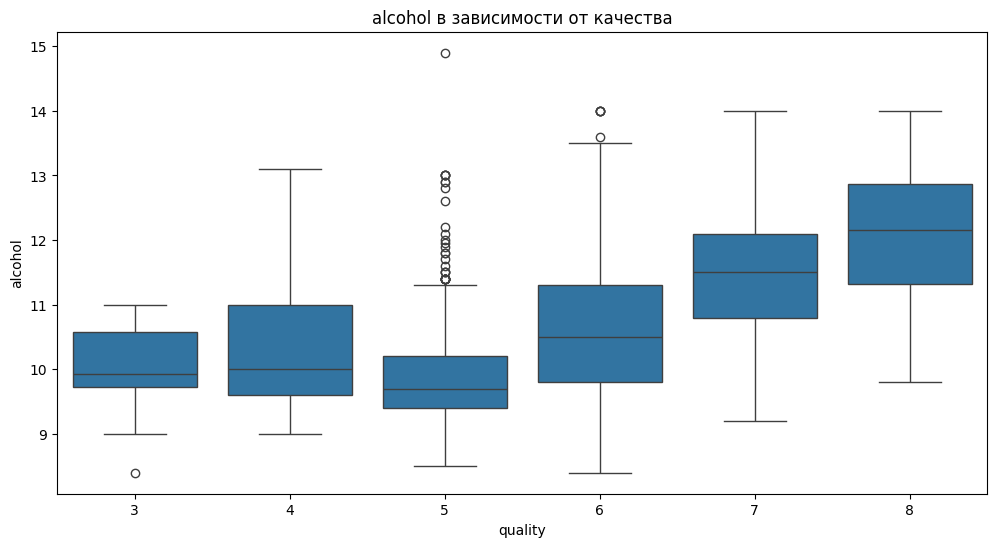

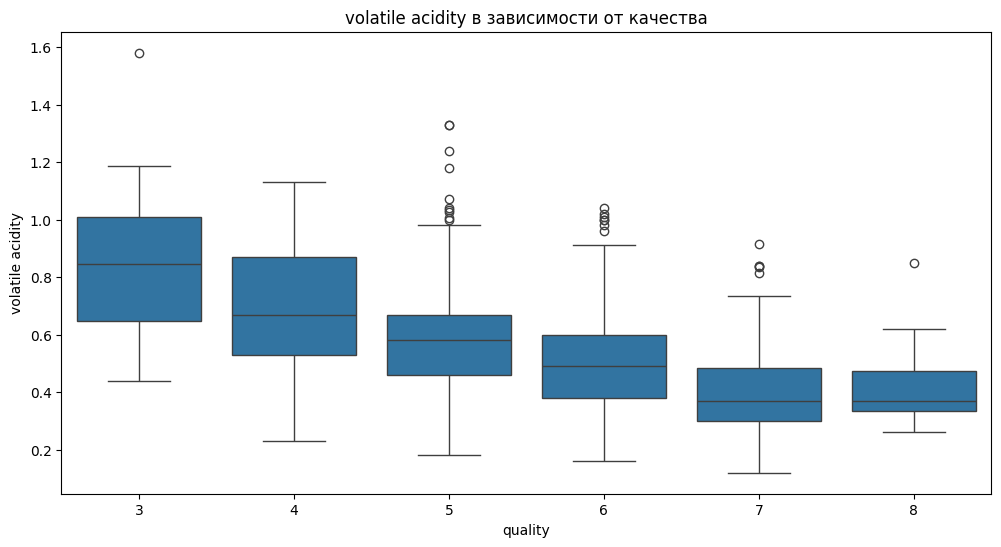

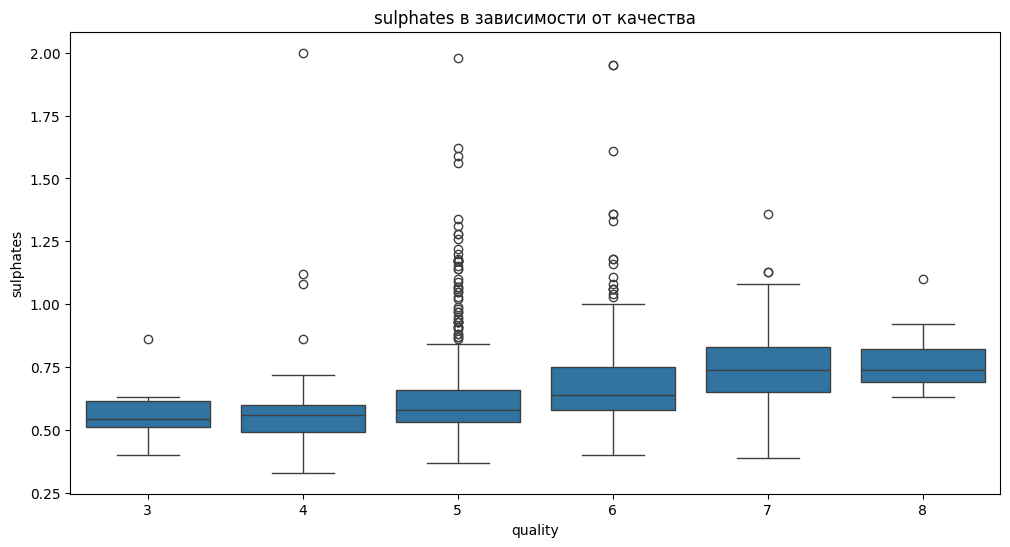

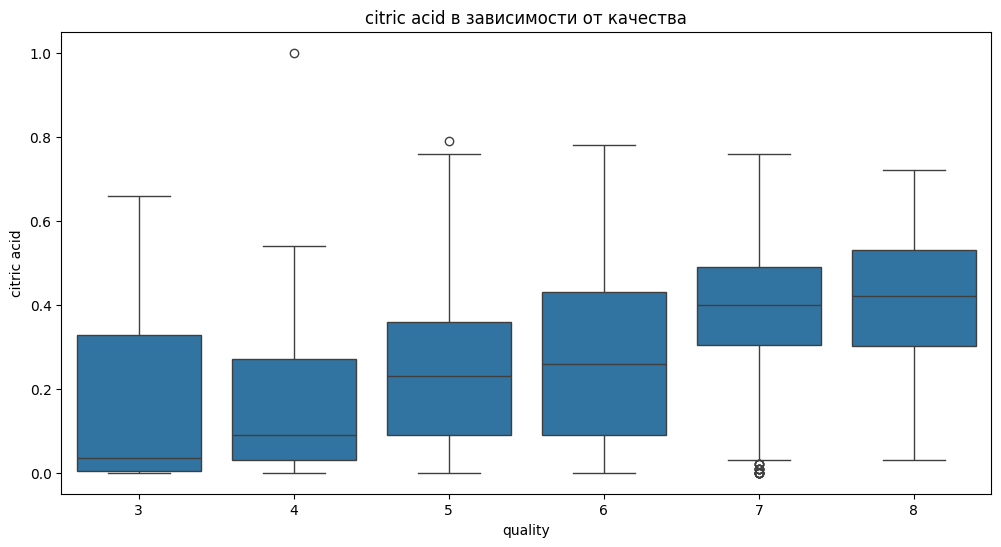

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Увеличим размер графиков
plt.rcParams['figure.figsize'] = (12, 6)

# 📌 Распределение целевой переменной
sns.countplot(x='quality', data=df)
plt.title("Распределение качества вина")
plt.show()

# 📌 Гистограммы признаков
df.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Гистограммы признаков", fontsize=16)
plt.show()

# 📌 Матрица корреляции
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Корреляция между признаками")
plt.show()

# 📌 Boxplot — как меняются признаки в зависимости от качества
features = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']
for feat in features:
    plt.figure()
    sns.boxplot(x='quality', y=feat, data=df)
    plt.title(f"{feat} в зависимости от качества")
    plt.show()


### **Feature Engineering + подготовка данных для модели.**

🎯 Цели на этом этапе:
- Преобразовать **`quality`** в бинарную метку (0 = плохое вино, 1 = хорошее)
- Добавить возможные новые признаки (например, **`acid_ratio`**)
- Масштабировать числовые данные (**`StandardScaler`**)
- Разделить данные на **`train`** и **`test`**

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 📌 1. Бинаризация метки: пусть quality >= 7 — это хорошее вино
df['good'] = (df['quality'] >= 7).astype(int)

# 📌 2. (опционально) Добавим признак: соотношение кислот
df['acid_ratio'] = df['fixed acidity'] / (df['volatile acidity'] + 1e-5)

# 📌 3. Разделим признаки и метку
X = df.drop(columns=['quality', 'good'])  # признаки
y = df['good']                            # целевая метка

# 📌 4. Делим на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 📌 5. Масштабируем признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Готово: признаки подготовлены, можно обучать модели!")


✅ Готово: признаки подготовлены, можно обучать модели!


### **Обучение моделей и сравнение качества (LogisticRegression, RandomForest, GradientBoosting)**

Обучим несколько моделей и сравним их производительность.

Мы используем:
- **`Logistic Regression`** — простая, быстрая
- **`Random Forest`** — ансамбль деревьев
- **`Gradient Boosting`** — мощный бустинг (из коробки хорош)

**📊 Как читать метрики:**

| Метрика       | Что означает                                                   |
| ------------- | -------------------------------------------------------------- |
| **precision** | Доля правильных среди всех **предсказанных положительных**     |
| **recall**    | Доля правильно найденных **среди всех реальных положительных** |
| **f1-score**  | Гармоническое среднее между precision и recall                 |
| **support**   | Сколько реальных объектов каждого класса                       |
| **accuracy**  | Общая точность модели (всех правильно / всех всего)            |



=== Logistic Regression ===
              precision    recall  f1-score   support

           0      0.906     0.975     0.939       277
           1      0.682     0.349     0.462        43

    accuracy                          0.891       320
   macro avg      0.794     0.662     0.700       320
weighted avg      0.876     0.891     0.875       320



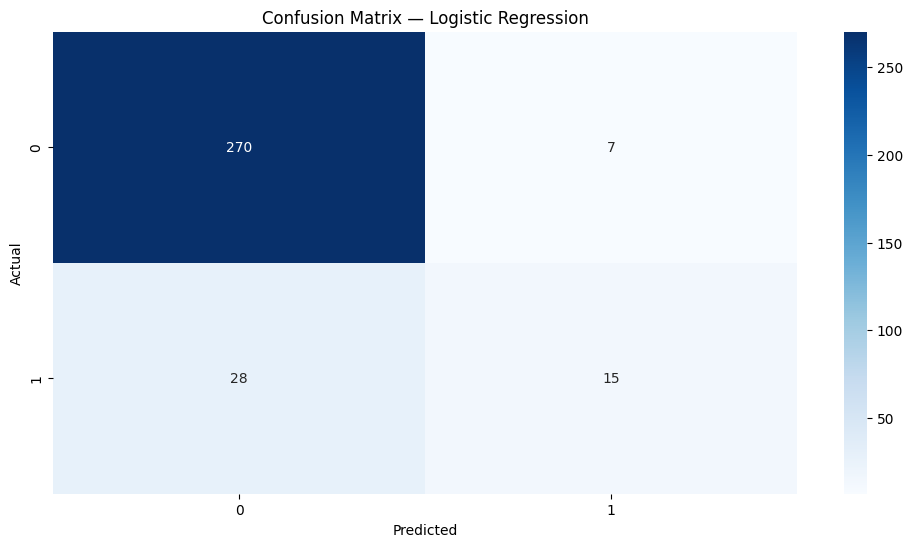


=== Random Forest ===
              precision    recall  f1-score   support

           0      0.938     0.989     0.963       277
           1      0.893     0.581     0.704        43

    accuracy                          0.934       320
   macro avg      0.916     0.785     0.834       320
weighted avg      0.932     0.934     0.928       320



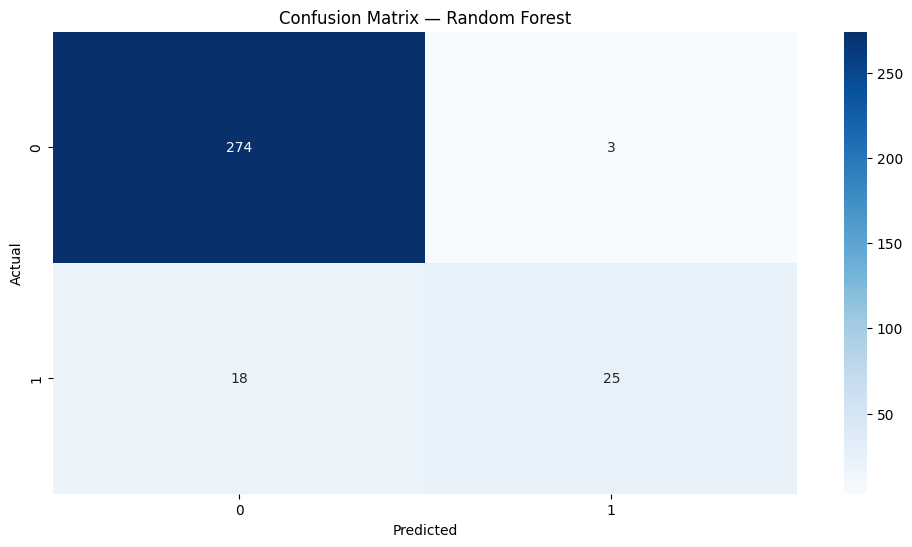


=== Gradient Boosting ===
              precision    recall  f1-score   support

           0      0.934     0.975     0.954       277
           1      0.774     0.558     0.649        43

    accuracy                          0.919       320
   macro avg      0.854     0.766     0.801       320
weighted avg      0.913     0.919     0.913       320



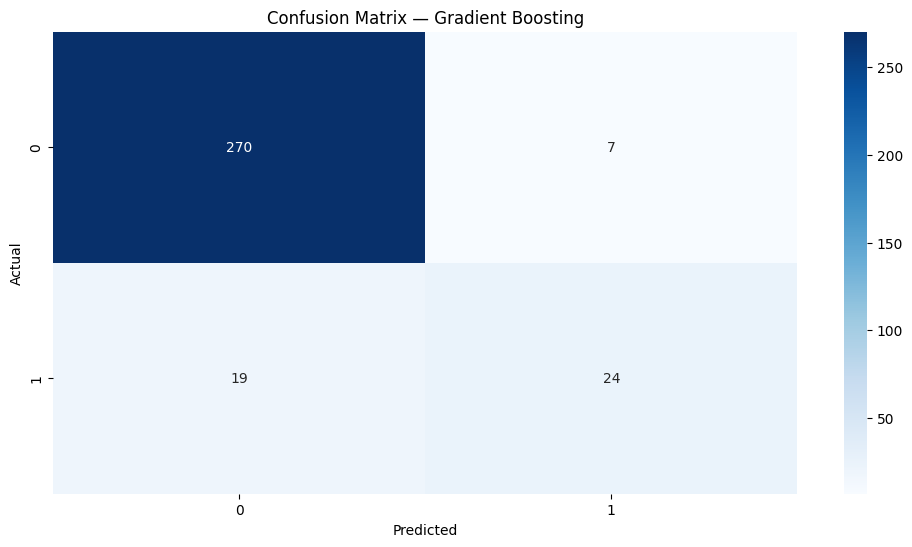

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 📌 Модели
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# 📊 Обучение и оценка
for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Отчёт
    print(classification_report(y_test, y_pred, digits=3))

    # Матрица ошибок
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix — {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


### 📊 Сравнение моделей по качеству классификации

| Модель               | Precision (класс 1) | Recall (класс 1) | F1-score (класс 1) | Accuracy | F1-score (macro avg) |
|----------------------|---------------------|------------------|--------------------|----------|-----------------------|
| Logistic Regression  | 0.682               | 0.349            | 0.462              | 0.891    | 0.700                 |
| Random Forest        | 0.893               | 0.581            | 0.704              | 0.934    | 0.834                 |
| Gradient Boosting    | 0.774               | 0.558            | 0.649              | 0.919    | 0.801                 |

✅ **Вывод**: Random Forest показывает лучший баланс между точностью и полнотой для важного класса `1` (хорошее вино), а также имеет наивысшую общую точность и макро-F1.


### **Деплой**

In [5]:
import gradio as gr
import numpy as np

# Загружаем
model = joblib.load("wine_model.pkl")
scaler = joblib.load("scaler.pkl")

# Названия признаков
features = X.columns.tolist()

# Функция предсказания
def predict_wine(*inputs):
    X_input = np.array(inputs).reshape(1, -1)
    X_scaled = scaler.transform(X_input)
    pred = model.predict(X_scaled)[0]
    return "Хорошее 🍷" if pred == 1 else "Обычное 🧪"

# Интерфейс
inputs = [gr.Number(label=col) for col in features]
demo = gr.Interface(fn=predict_wine, inputs=inputs, outputs="text", title="Предсказание качества вина")

demo.launch()
